<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio EDA y Gestión de Nulos

AutoRenew, una empresa líder en la venta de coches de segunda mano, te ha contratado para desarrollar un modelo predictivo que estime el precio de los vehículos usados. Este modelo ayudará a la empresa a mejorar sus estrategias de ventas, marketing y optimización del inventario. Para ello, cuentas con un conjunto de datos que contiene información detallada sobre diversas características de los coches usados. Sin embargo, como es común en conjuntos de datos reales, encontrarás valores nulos y necesitarás realizar un análisis exploratorio para identificar patrones, correlaciones y posibles anomalías.

 En este laboratorio, tu tarea es realizar un análisis exploratorio de los datos (EDA) y gestionar los valores nulos que encuentres. Este es solo el primer paso de un proyecto que se desarrollará durante toda la semana, en el que usarás este mismo conjunto de datos para practicar diferentes fases del preprocesamiento.

**Columnas del conjunto de datos:**

- **dateCrawled**: Fecha y hora en que se recolectaron los datos del coche.

- **name**: Nombre del anuncio, generalmente incluye la marca y el modelo del coche.

- **seller**: Tipo de vendedor (particular o concesionario).

- **offerType**: Tipo de oferta (venta o subasta).

- **price**: Precio del coche en la moneda local.

- **abtest**: Campo utilizado para pruebas A/B, indicando diferentes versiones del sitio web o anuncio.

- **vehicleType**: Tipo de vehículo (sedán, SUV, hatchback, etc.).

- **yearOfRegistration**: Año de registro del coche.

- **gearbox**: Tipo de caja de cambios (manual o automática).

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **model**: Modelo específico del coche.

- **kilometer**: Kilometraje total del coche.

- **monthOfRegistration**: Mes de registro del coche.

- **fuelType**: Tipo de combustible (gasolina, diésel, eléctrico, etc.).

- **brand**: Marca del coche.

- **notRepairedDamage**: Indica si el coche tiene daños no reparados.

- **dateCreated**: Fecha de creación del anuncio.

- **nrOfPictures**: Número de fotos en el anuncio.

- **postalCode**: Código postal de la ubicación del coche.

- **lastSeen**: Última fecha y hora en que el anuncio fue visto.

**Instrucciones:**

1. **Análisis Exploratorio de Datos (EDA):** Explora el conjunto de datos para familiarizarte con las diferentes características de los coches. Utiliza gráficos y estadísticas descriptivas para identificar patrones, tendencias y posibles anomalías.
   
2. **Gestión de Valores Nulos:** Identifica las columnas que contienen valores nulos y aplica las técnicas adecuadas para manejarlos. Esto podría incluir la imputación de valores, eliminación de filas o columnas, o cualquier otra estrategia que consideres apropiada.

**Nota:** Este laboratorio es el primer paso de una serie de actividades que realizarás esta semana utilizando el mismo conjunto de datos. Asegúrate de documentar bien tu trabajo, ya que lo utilizarás como base para los siguientes ejercicios.


## 1. Análisis Exploratorio de Datos

In [41]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
 
# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

In [42]:
from src import soporte_preprocesamiento as sp

Cargamos el archivo

In [43]:
df_autorenew =  pd.read_csv("datos/autorenew.csv")

In [44]:
df_autorenew.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,NaN,1993,manually,0.0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,2011,manually,187.0,NaN,125000,5,diesel,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,2004,automatic,161.0,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small car,2001,manually,74.0,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small car,2008,manually,68.0,fabia,90000,7,diesel,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [45]:
sp.exploracion_datos(df_autorenew)

El número de filas es 371528 y el número de columnas es 20

----------

En este conjunto de datos tenemos 4 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


vehicleType          36.003478
gearbox               5.439429
model                 5.513447
fuelType              8.986133
notRepairedDamage    19.395577
dtype: float64


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
price,371528.0,17295.141865,3.587954e+06,0.0,1150.0,2950.0,7200.0,2.147484e+09
yearOfRegistration,371528.0,2004.577997,9.286660e+01,1000.0,1999.0,2003.0,2008.0,9.999000e+03
powerCV,371528.0,113.967833,1.895166e+02,0.0,69.0,104.0,148.0,1.972600e+04
kilometer,371528.0,125618.688228,4.011234e+04,5000.0,125000.0,150000.0,150000.0,1.500000e+05
monthOfRegistration,371528.0,5.734445,3.712412e+00,0.0,3.0,6.0,9.0,1.200000e+01
nrOfPictures,371528.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
postalCode,371528.0,50820.667640,2.579908e+04,1067.0,30459.0,49610.0,71546.0,9.999800e+04



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
dateCrawled,371528,280500,2016-03-24 14:49:47,7
name,371528,233531,Ford_Fiesta,657
seller,371528,2,private,371525
offerType,371528,2,offer,371516
abtest,371528,2,test,192585
vehicleType,237765,7,small car,80023
gearbox,351319,2,manually,274214
model,351044,251,golf,30070
fuelType,338142,7,petrol,223857
brand,371528,40,volkswagen,79640



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dateCrawled          371528 non-null  object 
 1   name                 371528 non-null  object 
 2   seller               371528 non-null  object 
 3   offerType            371528 non-null  object 
 4   price                371528 non-null  int64  
 5   abtest               371528 non-null  object 
 6   vehicleType          237765 non-null  object 
 7   yearOfRegistration   371528 non-null  int64  
 8   gearbox              351319 non-null  object 
 9   powerCV              371528 non-null  float64
 10  model                351044 non-null  object 
 11  kilometer            371528 non-null  int64  
 12  monthOfRegistration  371528 non-null  int64  
 13  fuelType             338142 non-null  object 
 14  bran

None

### Columnas numéricas.

In [46]:
visualizador =sp.Visualizador(df_autorenew)

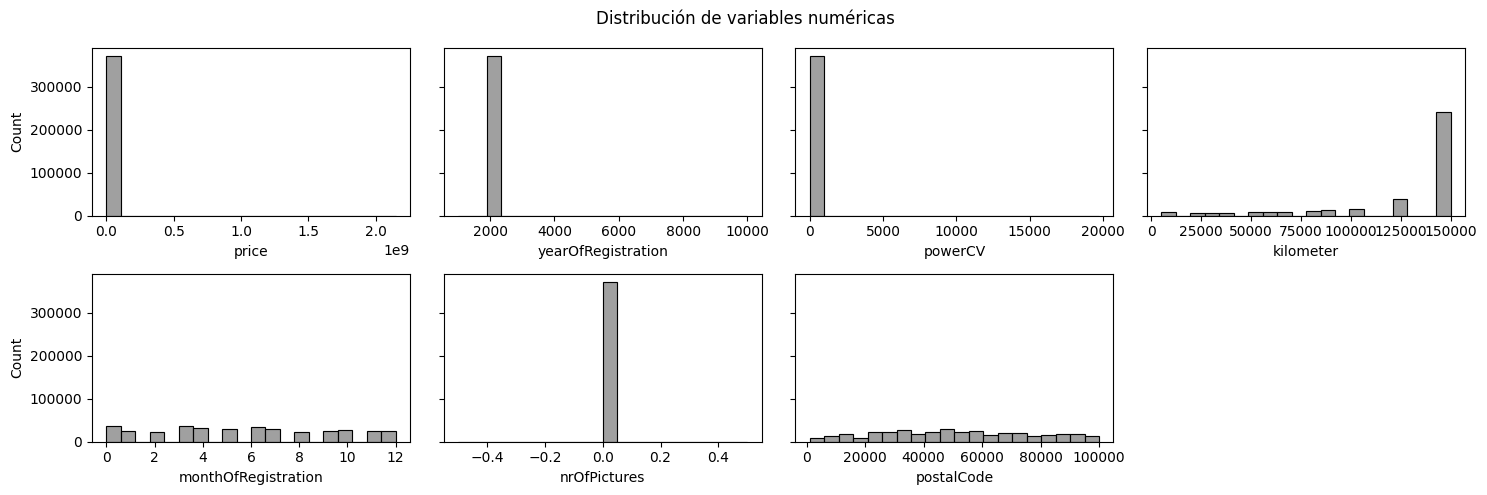

In [47]:

visualizador.plot_numericas()

**Interpretación**


In [48]:
df_autorenew.describe()

,price,yearOfRegistration,powerCV,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,113.967833,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,189.516594,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,104.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,148.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,19726.000000,150000.000000,12.000000,0.0,99998.00000


En la columna price, la mayoría de los valores están cercanos a 0, con una alta concentración en ese rango. Hay algunos valores extremadamente altos, lo que sugiere la presencia de outliers o datos anómalos en la variable de precio.

In [49]:
df_autorenew[df_autorenew['price'] == 0]


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,private,offer,0,test,NaN,1980,manually,49.0,andere,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
40,2016-03-26 22:06:17,Suche_Opel_corsa_a_zu_verschenken,private,offer,0,test,NaN,1990,NaN,0.0,corsa,150000,1,petrol,opel,NaN,2016-03-26 00:00:00,0,56412,2016-03-27 17:43:34
115,2016-03-19 18:40:12,Golf_IV_1.4_16V,private,offer,0,test,NaN,2017,manually,0.0,golf,5000,12,petrol,volkswagen,NaN,2016-03-19 00:00:00,0,21698,2016-04-01 08:47:05
119,2016-03-20 18:53:27,Polo_6n_Karosse_zu_verschenken,private,offer,0,test,small car,1999,NaN,0.0,NaN,5000,0,petrol,volkswagen,NaN,2016-03-20 00:00:00,0,37520,2016-04-07 02:45:22
157,2016-03-11 18:55:53,Opel_meriva_1.6_16_v_lpg__z16xe_no_OPC,private,offer,0,test,bus,2004,manually,100.0,meriva,150000,10,lpg,opel,yes,2016-03-11 00:00:00,0,27432,2016-03-12 23:47:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371356,2016-03-09 15:56:30,Verkaufen_einen_Opel_corsa_b_worlcup_cool,private,offer,0,control,NaN,2000,manually,64.0,corsa,150000,0,NaN,opel,yes,2016-03-09 00:00:00,0,23758,2016-03-30 11:16:08
371392,2016-03-20 14:55:07,Ford_Fiesta_1.3___60PS___Bj_2002___Klima___Servo,private,offer,0,test,small car,2002,manually,59.0,fiesta,150000,3,petrol,ford,NaN,2016-03-20 00:00:00,0,33659,2016-04-06 18:45:23
371402,2016-03-24 13:48:05,Suzuki_Swift_zu_verkaufen,private,offer,0,control,small car,1999,manually,52.0,swift,150000,3,petrol,suzuki,NaN,2016-03-24 00:00:00,0,42329,2016-04-07 05:17:24
371431,2016-03-10 22:55:50,Seat_Arosa,private,offer,0,control,small car,1999,manually,36.0,arosa,150000,7,petrol,seat,yes,2016-03-10 00:00:00,0,22559,2016-03-12 23:46:32


Vemos que hay 10778 valores iguales iguales a 0. No tiene sentido que haya coches con precio 0. Los vamos a convertir en nulos y después los imputaremos con alguno de los algoritmos que hemos estudiado

In [50]:
df_autorenew['price'] = df_autorenew['price'].replace(0, np.nan)

También hay valores de precio inusualmente altos. Tras consultar precios de coches de lujo y de las marcas presentes en eo dataframe con los precios más caros, decididmos llevarnos a nulo todos los valores de precio superiores a 1 millon. Probalemene nos estemos dejando valores falsos que rondan ese precio, pero no queremos correr el riesgo de alterar valores del dataframe que sean correctos.

In [51]:
df_autorenew.loc[df_autorenew['price'] >= 1000000, 'price'] = np.nan


Veamos ahora la variable 'yearOfRegistration'

Vamos a tratar esta variable como categórica

In [52]:
df_autorenew['yearOfRegistration'] = df_autorenew['yearOfRegistration'].astype(object)
diccionario_reemplazo = {
    "Desconocido": list(range(1886, 1950)) + list(range(2025, 2100)),
    "Antiguo": list(range(1950, 1980)),
    "Clásico": list(range(1980, 2000)),
    "Moderno": list(range(2000, 2015)),
    "Reciente": list(range(2015, 2025))
}

año_a_categoria = {}
for categoria, años in diccionario_reemplazo.items():
    for año in años:
        año_a_categoria[año] = categoria

df_autorenew['yearOfRegistration'] = df_autorenew['yearOfRegistration'].map(año_a_categoria).fillna('Desconocido')



De la columna powerCV llama la atención que ay varios ceros, lo que no tiene sentido en un valor de potencia de un coche

In [53]:
df_autorenew[df_autorenew["powerCV"] == 0]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480.0,test,NaN,Clásico,manually,0.0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
15,2016-03-11 21:39:15,KA_Lufthansa_Edition_450€_VB,private,offer,450.0,test,small car,Desconocido,NaN,0.0,ka,5000,0,petrol,ford,NaN,2016-03-11 00:00:00,0,24148,2016-03-19 08:46:47
32,2016-03-15 20:59:01,Golf_3_....._1.4,private,offer,245.0,test,NaN,Clásico,NaN,0.0,golf,150000,2,petrol,volkswagen,no,2016-03-15 00:00:00,0,44145,2016-03-17 18:17:43
37,2016-03-28 17:50:15,Renault_Kangoo_1.9_Diesel,private,offer,1500.0,test,NaN,Reciente,NaN,0.0,kangoo,150000,1,diesel,renault,no,2016-03-28 00:00:00,0,46483,2016-03-30 09:18:02
40,2016-03-26 22:06:17,Suche_Opel_corsa_a_zu_verschenken,private,offer,NaN,test,NaN,Clásico,NaN,0.0,corsa,150000,1,petrol,opel,NaN,2016-03-26 00:00:00,0,56412,2016-03-27 17:43:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371495,2016-03-31 19:52:33,Opel_Tigra,private,offer,180.0,control,NaN,Clásico,NaN,0.0,NaN,125000,3,petrol,opel,NaN,2016-03-31 00:00:00,0,41470,2016-04-06 14:18:04
371504,2016-03-07 17:06:35,220_cdi_Benz,private,offer,2600.0,control,NaN,Moderno,automatic,0.0,c_klasse,150000,9,NaN,mercedes_benz,NaN,2016-03-07 00:00:00,0,61169,2016-03-08 21:28:38
371521,2016-03-27 20:36:20,Opel_Zafira_1.6_Elegance_TÜV_12/16,private,offer,1150.0,control,bus,Moderno,manually,0.0,zafira,150000,3,petrol,opel,no,2016-03-27 00:00:00,0,26624,2016-03-29 10:17:23
371522,2016-03-21 09:50:58,Mitsubishi_Cold,private,offer,NaN,control,NaN,Moderno,manually,0.0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49


Hay 40820 nulos. Igual que hicimos con la columna price los pasamos a nulos para tratarlos luego cona alguno de los algoritmos estudiados

In [54]:
df_autorenew['powerCV'] = df_autorenew['powerCV'].replace(0, np.nan)

También hay valores absurdamente altos de potencia. Tras una consulta en Internet sobre los coches más potentes del mercado, decidimos llevar a nulo los valores de potencia iguales o por encima de 1000 CV

In [55]:
df_autorenew.loc[df_autorenew['powerCV'] >= 1000, 'powerCV'] = np.nan

In [56]:
df_autorenew.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480.0,test,NaN,Clásico,manually,NaN,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300.0,test,coupe,Moderno,manually,187.0,NaN,125000,5,diesel,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800.0,test,suv,Moderno,automatic,161.0,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500.0,test,small car,Moderno,manually,74.0,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600.0,test,small car,Moderno,manually,68.0,fabia,90000,7,diesel,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


En cuanto a kilometros, a luz de la gráfica y del describe observamos que hay una gran concentración de valores que valen 150000, concretamente de la mediana al maximo de la distribución valen eso. Vender de segunda mano coches con 150000 km es perfectamente posible, aunqeu es un poco sospechoso que haya tantos valores con ese kilometraje, y ninguno tenga un kilometraje mayor. O hay una política de empresa de no vender coches con un kilometraje superior a 150000 o hay motivos para sospechar de que el vendedor esta mintiendo sobre el kilometraje de los coches.

En todo caso, aquí no tiene sentido imputar porque con los algoritmos estudiados o sustituyendo por la media o la mediana, nos saldrian kilometrajes menores o como mucho iguales para esos valores. Y dado que no tenemos certezas sobre la veracidad de esos datos ni disponemos de metodos para obtener valores que puedan ser más plausibles (superiores a 150000) vamos a dejar esos valores tal cual están.

La columna "monthOfRegistration" que se refiere al mes de regisgro, a la luz del gráfico está distribuida a lo largo de los meses de forma similar y los datos son verosimiles. Siendo una categoría de fecaha la trataremos como categórica.

In [57]:
df_autorenew['monthOfRegistration'].replace(0, np.nan, inplace=True)
df_autorenew['monthOfRegistration'] = df_autorenew['monthOfRegistration'].astype(object)




In [58]:
df_autorenew.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480.0,test,NaN,Clásico,manually,NaN,golf,150000,NaN,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300.0,test,coupe,Moderno,manually,187.0,NaN,125000,5.0,diesel,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800.0,test,suv,Moderno,automatic,161.0,grand,125000,8.0,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500.0,test,small car,Moderno,manually,74.0,golf,150000,6.0,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600.0,test,small car,Moderno,manually,68.0,fabia,90000,7.0,diesel,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


La columna nnrOfPictures tiene todos sus valores en 0, no aporta valor a nuestro analisis y no tenemos forma de imputarla, así que la eliminamos

In [59]:
df_autorenew.drop(columns=['nrOfPictures'], inplace=True)


La variable postalCode se distribuye de foma similar en los distintos valores posibles de Codigo Postal. En todo caso el Codigo Postal lo vamos a tratar como variable categorica. La pasamos a object.

In [60]:
df_autorenew['postalCode'] = df_autorenew['postalCode'].astype(object)

Con este tratamiento de los datos y teniendo en cuenta las colunas que hemos recalificado como categórias veamos como quedan ahora nuestras distribuciones.

In [61]:
df_autorenew.reset_index(drop=True, inplace=True)

In [62]:
visualizador = sp.Visualizador(df_autorenew)

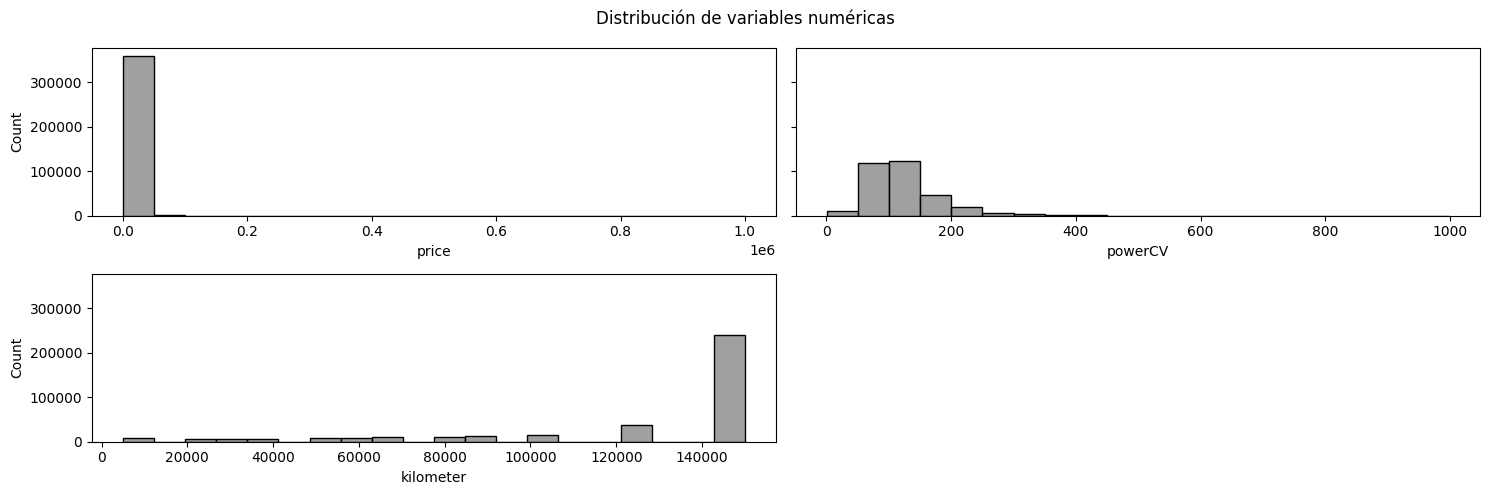

In [63]:
visualizador.plot_numericas()

A continuación estudiamos la relación entre las variables predictoras y la variable respuesta "price"

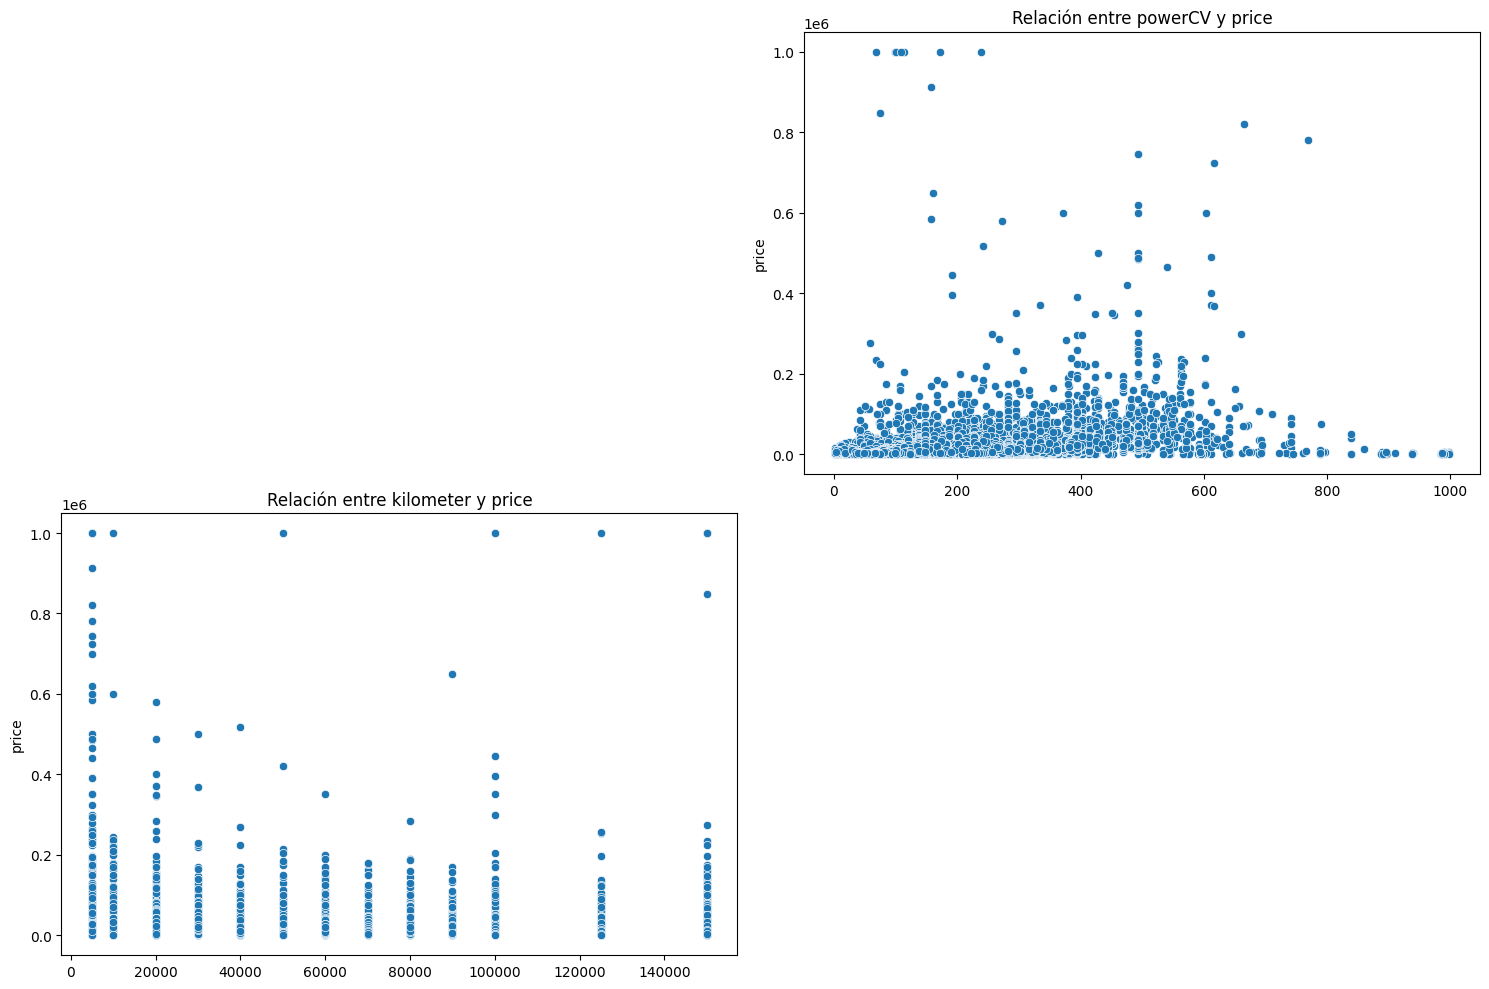

In [64]:
visualizador.relacion_numericas("price", (15,10))


**Relación entre powerCV y price**

En este gráfico, se observa que los vehículos con baja potencia (powerCV) tienden a tener una amplia gama de precios, mientras que a medida que la potencia aumenta, la concentración de precios altos disminuye.


La relación entre la potencia del vehículo (powerCV) y el precio muestra una gran dispersión.


Aunque la mayoría de los vehículos se encuentran en el rango de 0 a 400 CV y tienen precios relativamente bajos, hay algunos puntos dispersos que alcanzan valores de precio altos incluso para bajas potencias, sugieriendo que podrían ser datos equivocados.

Hay algunos puntos en el rango de precios altos, que podrían representar vehículos de alta gama o con características especiales, pero en general, los precios altos no están tan relacionados con la potencia del vehículo, por lo que concluimos que no se observa una relación clara o lineal entre la potencia y el precio.

**Relación entre kilometer y price**

Este gráfico muestra una relación negativa entre el kilometraje y el precio del vehículo. Los vehículos con kilometraje bajo tienden a tener precios más altos, mientras que a medida que el kilometraje aumenta, los precios tienden a disminuir.


La mayor concentración de precios altos ocurre en vehículos con kilometrajes bajos, lo cual es lógico, ya que un kilometraje bajo suele asociarse con un menor desgaste y un mejor estado del vehículo.

A pesar de esta tendencia general, existen algunos valores atípicos donde vehículos con kilometraje alto tienen precios inusualmente altos, lo que puede indicar condiciones especiales o errores en los datos.

**Correlación**

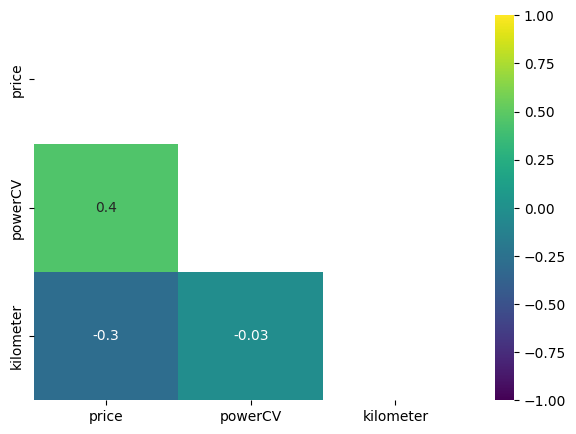

In [65]:
visualizador.correlacion()

Existe una correlación positiva moderada (0.4) entre el precio (price) y la potencia (powerCV). Esto sugiere que, en general, los vehículos con mayor potencia tienden a tener precios más altos, aunque la relación no es extremadamente fuerte. La potencia del motor es un factor relevante en el precio, pero no es el único.

Hay una correlación negativa moderada (-0.3) entre el precio (price) y el kilometraje (kilometer). Esto indica que, en general, los vehículos con mayor kilometraje tienden a tener precios más bajos. Aunque esta relación tampoco es muy fuerte, es consistente con la expectativa de que vehículos más usados pierdan valor.

La correlación entre powerCV y kilometer es cercana a cero (-0.03), lo cual indica que prácticamente no existe relación entre la potencia del vehículo y el kilometraje.
Esto es lógico, ya que la potencia del motor no está directamente relacionada con la cantidad de kilómetros recorridos.


**Detección de outliers**



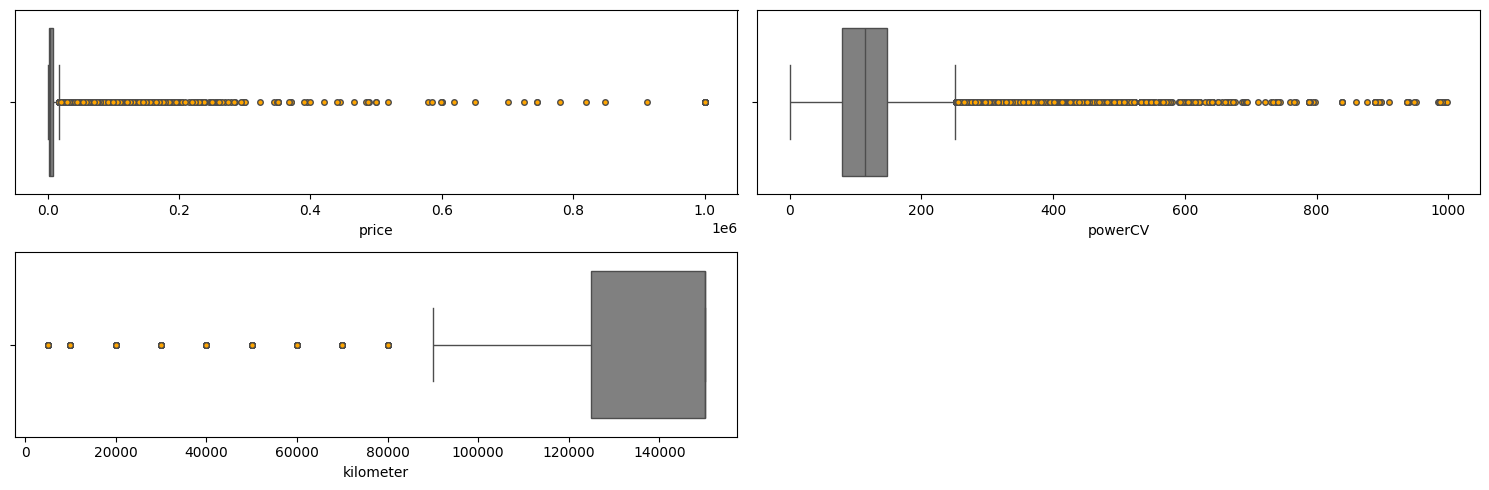

In [66]:
visualizador.deteccion_outliers()

Outliers de price: - El boxplot de price muestra una gran cantidad de valores atípicos en el extremo superior. - La mayor parte de los datos están concentrados cerca del límite inferior, lo que indica que la mayoría de los precios son bajos, mientras que algunos vehículos tienen precios extremadamente altos, alejados de la media. - Estos valores atípicos sugieren la presencia de vehículos de lujo o condiciones especiales en el conjunto de datos, o podrían ser datos erróneos.


Outliers de powerCV: - En el caso de powerCV, también se observan muchos valores atípicos en el extremo superior. - La mayoría de los vehículos tienen una potencia baja, pero hay un número significativo de vehículos con potencias superiores a 200 CV, extendiéndose hasta 1000 CV. Esto podría indicar la presencia de vehículos de alto rendimiento o deportivos en el conjunto de datos, o también posibles errores en la entrada de datos.


Outliers de kilometer: - El boxplot de kilometer muestra un comportamiento diferente. La mayoría de los datos están concentrados en el extremo superior, en torno a los 150.000 km. De hecho la mediana se situa ya en los 150.000 im - Los valores atípicos están en el lado inferior del boxplot, indicando que hay pocos vehículos con bajo kilometraje en comparación con el resto. - Esto, como ya comentamos antes nos hace sospechar de que la empresa o bien no venda vehículos por encima de los 150000 km por decisión propia o bien que oculte el kilometraje real de los vehículos que sobrepasan esa medición.


En general, los tres boxplots indican la presencia de valores extremos, especialmente en price y powerCV, lo cual puede afectar los análisis y modelos.

### Gestion de nulos

Vamos a aplicar

In [67]:
# Aplicamos KNN
df_num = df_autorenew.select_dtypes(include = np.number)
imputer_knn = KNNImputer(n_neighbors=2)
knn_imputado = imputer_knn.fit_transform(df_autorenew.select_dtypes(include = np.number)) #columnas que quiero que use para rellenar los vecinos
knn_imputado

array([[4.800e+02, 1.285e+02, 1.500e+05],
       [1.830e+04, 1.870e+02, 1.250e+05],
       [9.800e+03, 1.610e+02, 1.250e+05],
       ...,
       [9.200e+03, 1.010e+02, 1.500e+05],
       [3.400e+03, 9.900e+01, 1.500e+05],
       [2.899e+04, 3.160e+02, 5.000e+04]])

In [68]:
df_num_sin_nulos= pd.DataFrame(knn_imputado, columns=df_num.columns)
df_knn = df_autorenew.copy()
df_knn[df_num.columns] = df_num_sin_nulos
df_knn.isnull().sum()

dateCrawled                 0
name                        0
seller                      0
offerType                   0
price                       0
abtest                      0
vehicleType            133763
yearOfRegistration          0
gearbox                 20209
powerCV                     0
model                   20484
kilometer                   0
monthOfRegistration     37675
fuelType                33386
brand                       0
notRepairedDamage       72060
dateCreated                 0
postalCode                  0
lastSeen                    0
dtype: int64

In [69]:
df_knn.to_csv("datos/knn.csv")

In [70]:
imputer_iterative = IterativeImputer(estimator=RandomForestRegressor()) 
iterative_imputado = imputer_iterative.fit_transform(df_num)
df_num_sin_nulos_iterative = pd.DataFrame(iterative_imputado, columns = df_num.columns)
df_iterative = df_autorenew.copy()
df_iterative[df_num.columns] = df_num_sin_nulos_iterative
df_iterative.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480.0,test,NaN,Clásico,manually,84.646901,golf,150000.0,NaN,petrol,volkswagen,NaN,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300.0,test,coupe,Moderno,manually,187.000000,NaN,125000.0,5.0,diesel,audi,yes,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800.0,test,suv,Moderno,automatic,161.000000,grand,125000.0,8.0,diesel,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500.0,test,small car,Moderno,manually,74.000000,golf,150000.0,6.0,petrol,volkswagen,no,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600.0,test,small car,Moderno,manually,68.000000,fabia,90000.0,7.0,diesel,skoda,no,2016-03-31 00:00:00,60437,2016-04-06 10:17:21


In [71]:
df_iterative.to_csv("datos/iterative.csv")

In [72]:
df_iterative.describe()


,price,powerCV,kilometer
count,371528.000000,371528.000000,371528.000000
mean,5923.847881,122.255027,125618.688228
std,12053.036525,60.248808,40112.337051
min,1.000000,1.000000,5000.000000
25%,1250.000000,79.927782,125000.000000
50%,3000.000000,110.168074,150000.000000
75%,7300.000000,148.000000,150000.000000
max,999999.000000,998.000000,150000.000000


In [73]:
df_autorenew.describe()


,price,powerCV,kilometer
count,360680.000000,330418.000000,371528.000000
mean,5985.411828,124.314828,125618.688228
std,12080.840413,62.427850,40112.337051
min,1.000000,1.000000,5000.000000
25%,1250.000000,79.000000,125000.000000
50%,3000.000000,114.000000,150000.000000
75%,7490.000000,148.000000,150000.000000
max,999999.000000,998.000000,150000.000000


In [74]:
df_knn.describe()


,price,powerCV,kilometer
count,371528.000000,371528.000000,371528.000000
mean,5901.974639,122.406066,125618.688228
std,11951.109468,60.742821,40112.337051
min,1.000000,1.000000,5000.000000
25%,1250.000000,79.000000,125000.000000
50%,2999.000000,111.000000,150000.000000
75%,7281.250000,148.000000,150000.000000
max,999999.000000,998.000000,150000.000000


**Comparación de resultados**


Para comprobar qué metodo de impugnación ha producido mejores resultados, hacemos hecho los tres describes, de arriba, uno para cada metodo y otro para el df original comprobando que, el método que ha dado mejores resultados acercándose a los valores del dataframe original, es el Iterative Imputer, haciendo uso del Random Forest Regressor.

### Valores categóricos

Dado que tenemos un dataFrame con muchas filas, y muchas columnas categóricas, vamos a quitar del dataFrame aquellas columnas que podamos prescindir para el EDA, y así tratar de agilizar el proceso sin que se resienta el análisis.

In [75]:
df_aux = df_autorenew[['postalCode', 'name', 'model', 'lastSeen', 'dateCreated', 'dateCrawled']]

df_autorenew.drop(columns=['postalCode', 'name', 'model', 'lastSeen', 'dateCreated', 'dateCrawled'], inplace=True)


In [76]:
visualizador = sp.Visualizador(df_autorenew)

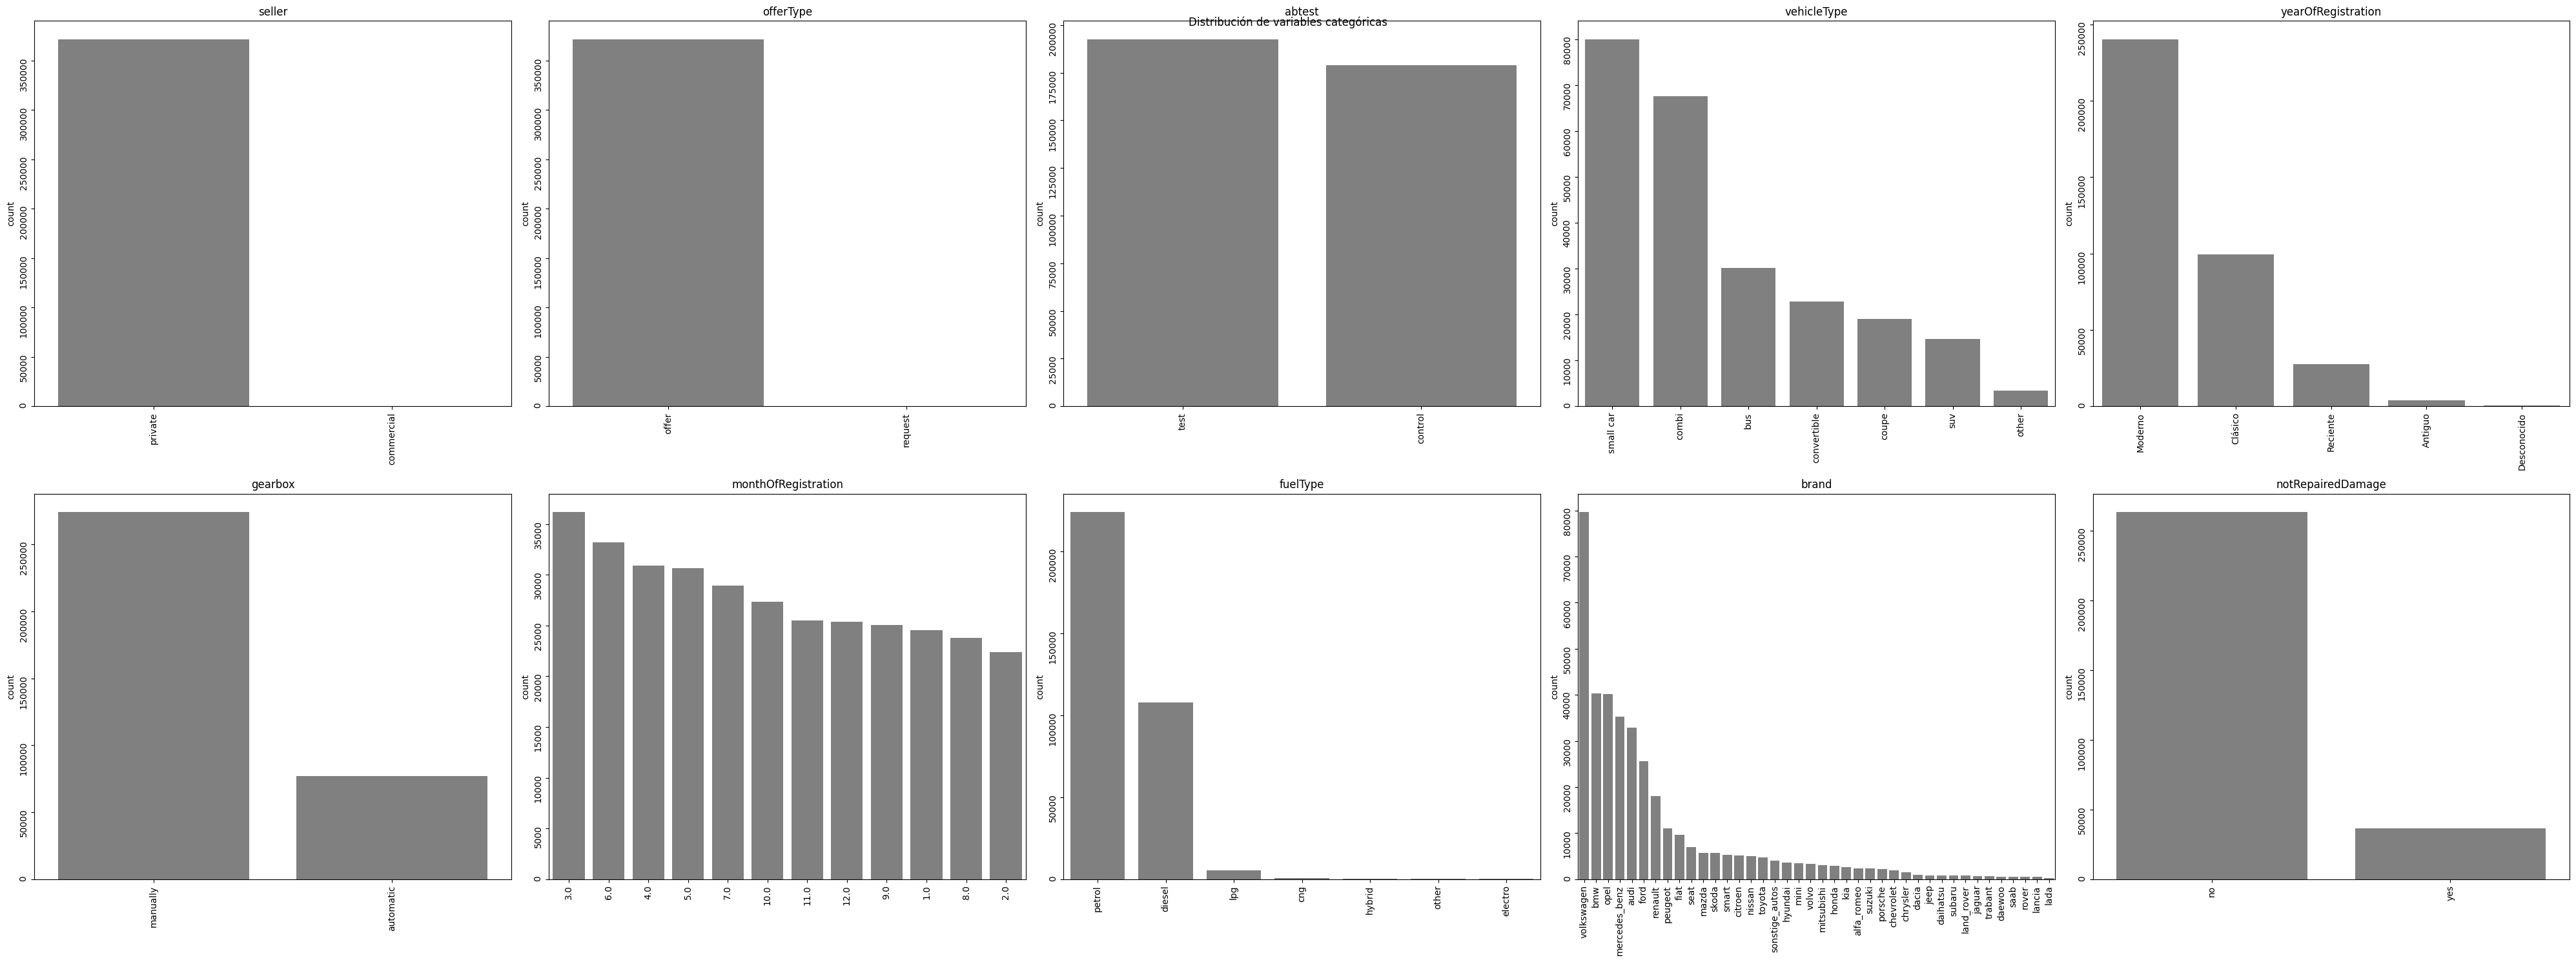

In [77]:
visualizador.plot_categoricas()

In [78]:
# Separamos el dataframe en variables numericas y categoricas
df_numericas, df_categoricas= visualizador.separar_dataframes()

In [79]:
df_categoricas.head()

,seller,offerType,abtest,vehicleType,yearOfRegistration,gearbox,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,test,NaN,Clásico,manually,NaN,petrol,volkswagen,NaN
1,private,offer,test,coupe,Moderno,manually,5.0,diesel,audi,yes
2,private,offer,test,suv,Moderno,automatic,8.0,diesel,jeep,NaN
3,private,offer,test,small car,Moderno,manually,6.0,petrol,volkswagen,no
4,private,offer,test,small car,Moderno,manually,7.0,diesel,skoda,no


### Gestion de nulos

In [80]:
df_categoricas.isna().sum()


seller                      0
offerType                   0
abtest                      0
vehicleType            133763
yearOfRegistration          0
gearbox                 20209
monthOfRegistration     37675
fuelType                33386
brand                       0
notRepairedDamage       72060
dtype: int64

In [81]:
# montOfRegistration
moda_month = df_categoricas['monthOfRegistration'].mode()[0]

# Reemplazar los valores nulos con la moda
df_categoricas['monthOfRegistration'] = df_categoricas['monthOfRegistration'].fillna(moda_month)


In [82]:
# vehicleType
df_categoricas["vehicleType"].fillna("desconocido", inplace=True)

In [83]:
# gearbox
df_categoricas["gearbox"].fillna("desconocido", inplace=True)

In [84]:
# FuelType

df_categoricas["fuelType"].fillna("desconocido", inplace=True)


In [85]:
#notRepairedDamage
df_categoricas["notRepairedDamage"].fillna("desconocido", inplace=True)


In [87]:
df_categoricas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   seller               371528 non-null  object 
 1   offerType            371528 non-null  object 
 2   abtest               371528 non-null  object 
 3   vehicleType          371528 non-null  object 
 4   yearOfRegistration   371528 non-null  object 
 5   gearbox              371528 non-null  object 
 6   monthOfRegistration  371528 non-null  float64
 7   fuelType             371528 non-null  object 
 8   brand                371528 non-null  object 
 9   notRepairedDamage    371528 non-null  object 
dtypes: float64(1), object(9)
memory usage: 28.3+ MB


In [88]:
df_categoricas.head()

,seller,offerType,abtest,vehicleType,yearOfRegistration,gearbox,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,test,desconocido,Clásico,manually,3.0,petrol,volkswagen,desconocido
1,private,offer,test,coupe,Moderno,manually,5.0,diesel,audi,yes
2,private,offer,test,suv,Moderno,automatic,8.0,diesel,jeep,desconocido
3,private,offer,test,small car,Moderno,manually,6.0,petrol,volkswagen,no
4,private,offer,test,small car,Moderno,manually,7.0,diesel,skoda,no


In [86]:
df_categoricas.to_csv("datos/categoricas.csv")